Your objective is to build a Bubble Plot that showcases the relationship between four key variables:
•Average Fare ($) Per City
•Total Number of Rides Per City
•Total Number of Drivers Per City
•City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:
•% of Total Fares by City Type
•% of Total Rides by City Type
•% of Total Drivers by City Type

In [49]:
# Dependencies
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [4]:
# open the two data files and transform them into dataframes
city_file = "raw_data/city_data.csv"
ride_file = "raw_data/ride_data.csv" 



In [5]:
city_df = pd.read_csv(city_file)
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
ride_df = pd.read_csv(ride_file)
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [7]:
# perform an inner join - intersection
merged_cityride_df = pd.merge(city_df, ride_df, on = "city")
merged_cityride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [8]:
merged_cityride_df.describe()

,driver_count,fare,ride_id
count,2407.00000,2407.000000,2.407000e+03
mean,31.14167,26.867104,4.856048e+12
std,22.05840,12.007238,2.898402e+12
min,1.00000,4.050000,2.238753e+09
25%,12.00000,17.320000,2.354637e+12
50%,24.00000,26.490000,4.804713e+12
75%,51.00000,36.710000,7.356325e+12
max,73.00000,59.650000,9.997901e+12


In [9]:
# Provides you the average fare per city (125 rows), use this for the Y-axis of the bubble chart
groupbycity = merged_cityride_df.groupby(["city", "type"])
groupbycity.mean()

,,driver_count,fare,ride_id
city,type,,,
Alvarezhaven,Urban,21.0,23.928710,5.351586e+12
Alyssaberg,Urban,67.0,20.609615,3.536678e+12
Anitamouth,Suburban,16.0,37.315556,4.195870e+12
Antoniomouth,Urban,21.0,23.625000,5.086800e+12
Aprilchester,Urban,49.0,21.981579,4.574788e+12
Arnoldview,Urban,41.0,25.106452,5.021952e+12
Campbellport,Suburban,26.0,33.711333,5.805424e+12
Carrollbury,Suburban,4.0,36.606000,4.274615e+12
Carrollfort,Urban,55.0,25.395517,4.759008e+12


In [10]:
groupbycitynotype = merged_cityride_df.groupby(["city"])
#groupbycitynotype.mean()

In [11]:
# Provides you with the total driver count per city, 125 rows - use this for the size of the bubble chart
groupbycity.sum()

,,driver_count,fare,ride_id
city,type,,,
Alvarezhaven,Urban,651,741.79,165899161874789
Alyssaberg,Urban,1742,535.85,91953627077845
Anitamouth,Suburban,144,335.84,37762826439863
Antoniomouth,Urban,462,519.75,111909606921566
Aprilchester,Urban,931,417.65,86920968698689
Arnoldview,Urban,1271,778.30,155680516453154
Campbellport,Suburban,390,505.67,87081359966001
Carrollbury,Suburban,40,366.06,42746154832213
Carrollfort,Urban,1595,736.47,138011218621745


In [12]:
# Gives you the total # of Rides per city (125 rows), this is the x-axis of the bubble chart
groupbycity.count()

,,driver_count,date,fare,ride_id
city,type,,,,
Alvarezhaven,Urban,31,31,31,31
Alyssaberg,Urban,26,26,26,26
Anitamouth,Suburban,9,9,9,9
Antoniomouth,Urban,22,22,22,22
Aprilchester,Urban,19,19,19,19
Arnoldview,Urban,31,31,31,31
Campbellport,Suburban,15,15,15,15
Carrollbury,Suburban,10,10,10,10
Carrollfort,Urban,29,29,29,29


In [13]:
ave_fare_df = groupbycity.mean()  

In [14]:
ave_fare_df.head()

,,driver_count,fare,ride_id
city,type,,,
Alvarezhaven,Urban,21.0,23.928710,5.351586e+12
Alyssaberg,Urban,67.0,20.609615,3.536678e+12
Anitamouth,Suburban,16.0,37.315556,4.195870e+12
Antoniomouth,Urban,21.0,23.625000,5.086800e+12
Aprilchester,Urban,49.0,21.981579,4.574788e+12


In [15]:
# delete driver_count and ride_id columns because these are the average values and not what we want
del ave_fare_df["driver_count"]

In [16]:
del ave_fare_df["ride_id"]

In [17]:
ave_fare_df.head()

,,fare
city,type,
Alvarezhaven,Urban,23.928710
Alyssaberg,Urban,20.609615
Anitamouth,Suburban,37.315556
Antoniomouth,Urban,23.625000
Aprilchester,Urban,21.981579


In [18]:
ave_fare_df = ave_fare_df.reset_index()

In [19]:
#ave_fare_df.head()

In [20]:
ave_fare_df.rename(columns={"fare":"ave_fare_percity"}, inplace=True)

In [21]:
ave_fare_df.head()

,city,type,ave_fare_percity
0,Alvarezhaven,Urban,23.928710
1,Alyssaberg,Urban,20.609615
2,Anitamouth,Suburban,37.315556
3,Antoniomouth,Urban,23.625000
4,Aprilchester,Urban,21.981579


In [22]:
#setup another dataframe without the type column
drive_sum_df = groupbycitynotype.sum()

In [23]:
#drive_sum_df.head()

In [24]:
del drive_sum_df["fare"]

In [25]:
del drive_sum_df["ride_id"]

In [26]:
#drive_sum_df.head()

In [27]:
drive_sum_df = drive_sum_df.reset_index()

In [28]:
#drive_sum_df.head()

In [29]:
drive_sum_df.rename(columns={"driver_count":"total_drivers_percity"}, inplace=True)

In [30]:
drive_sum_df.head()

,city,total_drivers_percity
0,Alvarezhaven,651
1,Alyssaberg,1742
2,Anitamouth,144
3,Antoniomouth,462
4,Aprilchester,931


In [31]:
tot_rides_df = groupbycitynotype.count()

In [32]:
#tot_rides_df.head()

In [33]:
del tot_rides_df["driver_count"]

In [34]:
del tot_rides_df["type"]

In [35]:
del tot_rides_df["fare"]

In [36]:
del tot_rides_df["ride_id"]

In [37]:
#tot_rides_df.head()

In [38]:
tot_rides_df = tot_rides_df.reset_index()

In [39]:
tot_rides_df.head()

,city,date
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [40]:
# rename column from date to total_rides_percity
tot_rides_df.rename(columns={"date": "total_rides_percity"}, inplace=True)

In [41]:
fare_drive = pd.merge(ave_fare_df, drive_sum_df, on = "city")

In [42]:
pyber_bubble_df = pd.merge(fare_drive, tot_rides_df, on = "city")

In [43]:
pyber_bubble_df.head()

,city,type,ave_fare_percity,total_drivers_percity,total_rides_percity
0,Alvarezhaven,Urban,23.928710,651,31
1,Alyssaberg,Urban,20.609615,1742,26
2,Anitamouth,Suburban,37.315556,144,9
3,Antoniomouth,Urban,23.625000,462,22
4,Aprilchester,Urban,21.981579,931,19


In [44]:
df = pyber_bubble_df

In [45]:
analysis = df.groupby("type")
analysis.mean()

,ave_fare_percity,total_drivers_percity,total_rides_percity
type,,,
Rural,34.207143,40.388889,6.944444
Suburban,30.942131,237.317073,16.024390
Urban,24.603991,977.287879,24.621212


In [46]:
df.dtypes

city                      object
type                      object
ave_fare_percity         float64
total_drivers_percity      int64
total_rides_percity        int64
dtype: object

In [47]:
df.count()

city                     125
type                     125
ave_fare_percity         125
total_drivers_percity    125
total_rides_percity      125
dtype: int64

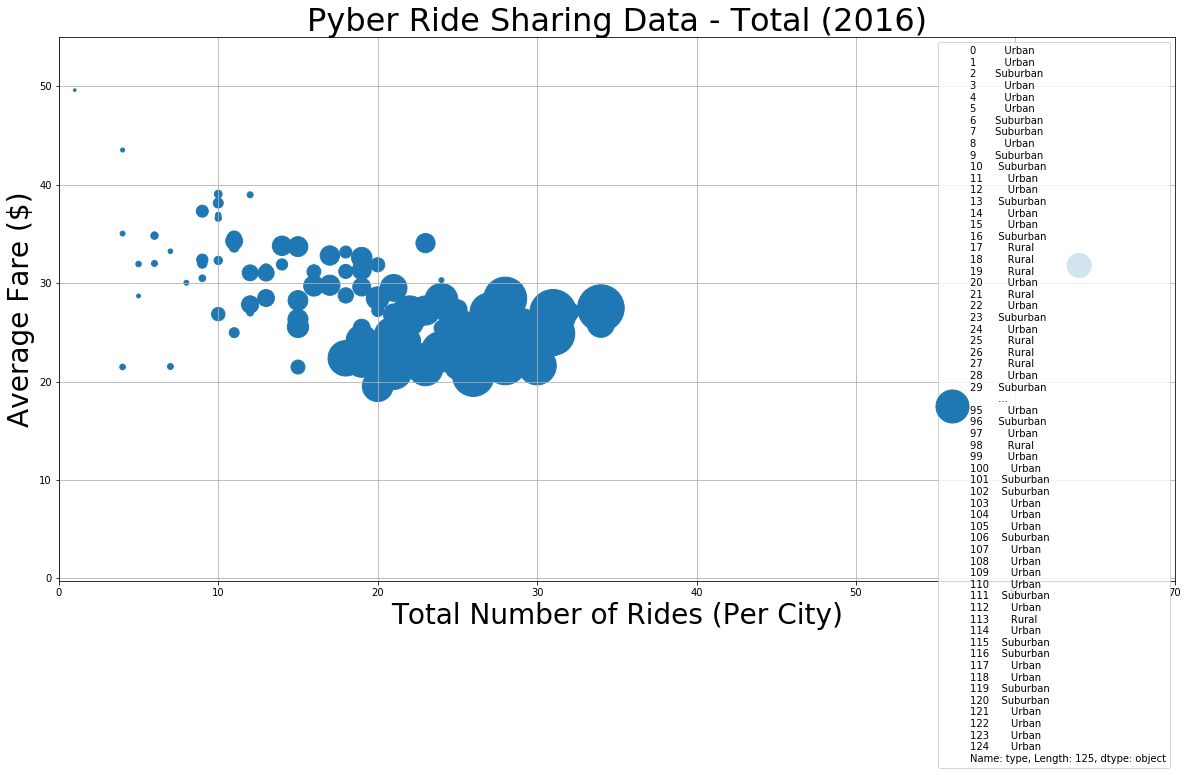

In [81]:
# Create a scatter plot  
my_plot = df.plot(kind="scatter", x="total_rides_percity", y="ave_fare_percity", grid=True, figsize=(20,10), title="Pyber Ride Sharing Data - Total (2016)", label=df.type, sizes=(df['total_drivers_percity']))
my_plot.set_xlabel("Total Number of Rides (Per City)", fontsize=28)
my_plot.set_ylabel("Average Fare ($)", fontsize=28)
my_plot.set_title(my_plot.title.get_text(), fontsize=32)
my_plot.set_ylim(-0.25, 55)
my_plot.set_xlim(0,70)
my_plot.legend()
plt.show()

In [51]:
pyber_bubble_urban_df = pyber_bubble_df[pyber_bubble_df.type =="Urban"]

In [52]:
pyber_bubble_urban_df.head()

,city,type,ave_fare_percity,total_drivers_percity,total_rides_percity
0,Alvarezhaven,Urban,23.928710,651,31
1,Alyssaberg,Urban,20.609615,1742,26
3,Antoniomouth,Urban,23.625000,462,22
4,Aprilchester,Urban,21.981579,931,19
5,Arnoldview,Urban,25.106452,1271,31


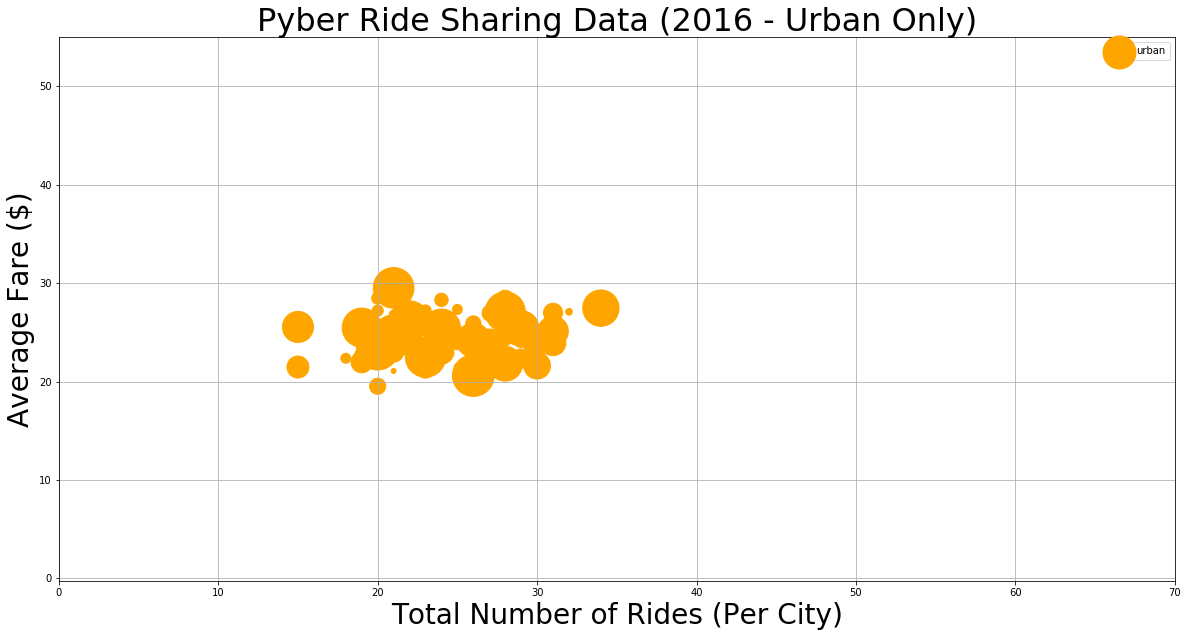

In [80]:
# Create a scatter plot - Urban only 
my_plot = pyber_bubble_urban_df.plot(kind="scatter", x="total_rides_percity", y="ave_fare_percity", color = "orange", grid=True, figsize=(20,10), title="Pyber Ride Sharing Data (2016 - Urban Only)", label="urban", sizes=(df['total_drivers_percity']))
my_plot.set_xlabel("Total Number of Rides (Per City)", fontsize=28)
my_plot.set_ylabel("Average Fare ($)", fontsize=28)
my_plot.set_title(my_plot.title.get_text(), fontsize=32)
my_plot.set_ylim(-0.25, 55)
my_plot.set_xlim(0,70)
my_plot.legend()
plt.show()

In [57]:
df1 = pyber_bubble_urban_df
#x_axis1 = df1["total_rides_percity"].tolist()
df1.head()

,city,type,ave_fare_percity,total_drivers_percity,total_rides_percity
0,Alvarezhaven,Urban,23.928710,651,31
1,Alyssaberg,Urban,20.609615,1742,26
3,Antoniomouth,Urban,23.625000,462,22
4,Aprilchester,Urban,21.981579,931,19
5,Arnoldview,Urban,25.106452,1271,31


In [58]:
#x_axis1 = df1["total_rides_percity"].tolist()
x_axis1 = list(df1.total_rides_percity.values)
print(len(x_axis1))
#x_axis1
y_axis1 = list(df1.ave_fare_percity.values)
print(len(y_axis1))
size1 = list(df1.total_drivers_percity.values)
print(len(size1))

66
66
66


In [59]:
pyber_bubble_rural_df = pyber_bubble_df[pyber_bubble_df.type =="Rural"]
df2 = pyber_bubble_rural_df

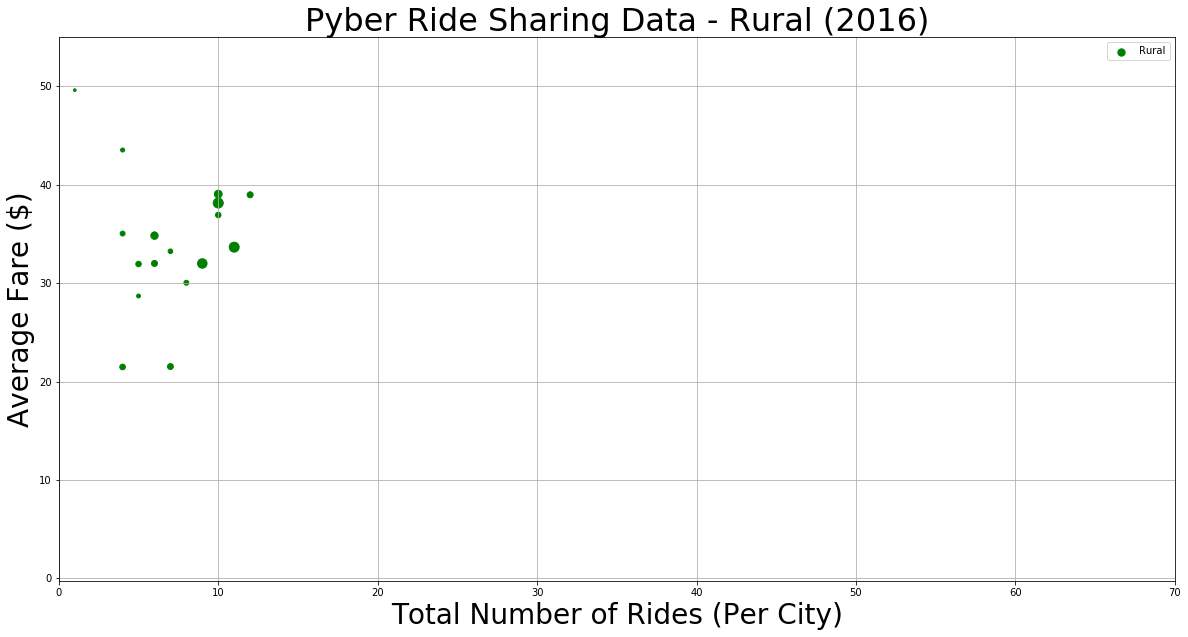

In [79]:
# Create a scatter plot  
my_plot = df2.plot(kind="scatter", x="total_rides_percity", y="ave_fare_percity", grid=True, figsize=(20,10), title="Pyber Ride Sharing Data - Rural (2016)", label="Rural", color = "green", sizes=(df2['total_drivers_percity']))
my_plot.set_xlabel("Total Number of Rides (Per City)", fontsize=28)
my_plot.set_ylabel("Average Fare ($)", fontsize=28)
my_plot.set_title(my_plot.title.get_text(), fontsize=32)
my_plot.set_ylim(-0.25, 55)
my_plot.set_xlim(0,70)
my_plot.legend()
plt.show()

In [60]:
pyber_bubble_Suburban_df = pyber_bubble_df[pyber_bubble_df.type =="Suburban"]
df3 = pyber_bubble_Suburban_df

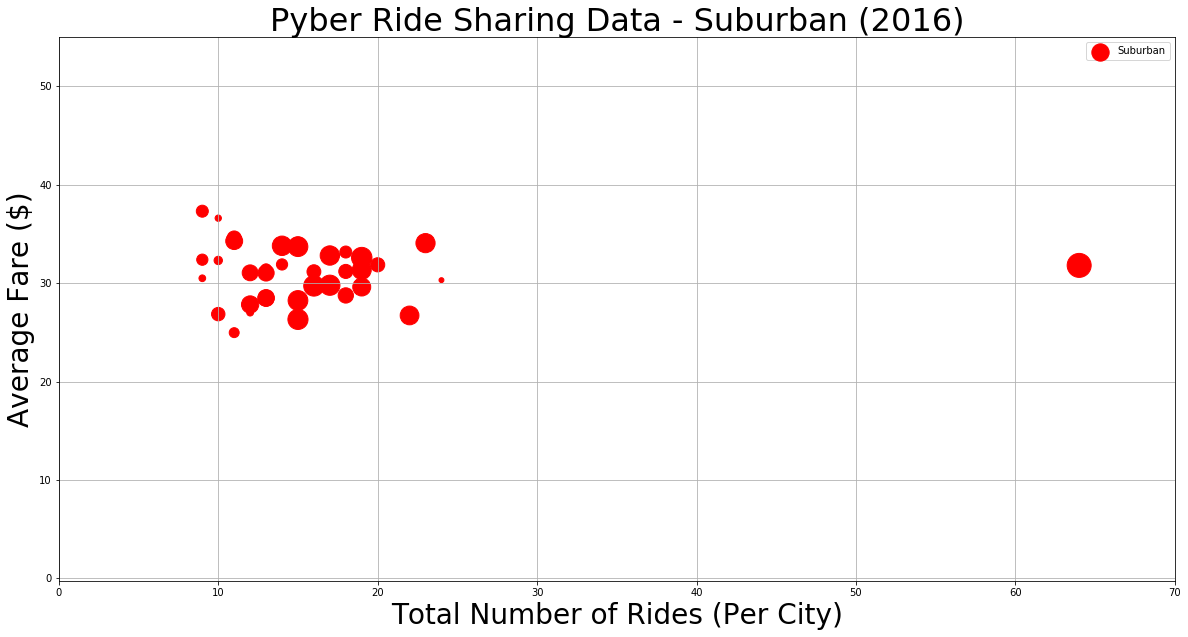

In [83]:
# Create a scatter plot  
my_plot = df3.plot(kind="scatter", x="total_rides_percity", y="ave_fare_percity", grid=True, figsize=(20,10), title="Pyber Ride Sharing Data - Suburban (2016)", label="Suburban", color = "red", sizes=(df3['total_drivers_percity']))
my_plot.set_xlabel("Total Number of Rides (Per City)", fontsize=28)
my_plot.set_ylabel("Average Fare ($)", fontsize=28)
my_plot.set_title(my_plot.title.get_text(), fontsize=32)
my_plot.set_ylim(-0.25, 55)
my_plot.set_xlim(0,70)
my_plot.legend()
plt.show()

In [61]:
# This is the 2nd part of the problem
pyber_bubble_df.head()

,city,type,ave_fare_percity,total_drivers_percity,total_rides_percity
0,Alvarezhaven,Urban,23.928710,651,31
1,Alyssaberg,Urban,20.609615,1742,26
2,Anitamouth,Suburban,37.315556,144,9
3,Antoniomouth,Urban,23.625000,462,22
4,Aprilchester,Urban,21.981579,931,19


In [62]:
pyber_bubble_df.count()

city                     125
type                     125
ave_fare_percity         125
total_drivers_percity    125
total_rides_percity      125
dtype: int64

In [63]:
groupbytype = pyber_bubble_df.groupby(["type"])


In [64]:
pie_df = groupbytype.sum()
pie_dfIndex = pie_df.reset_index()
pie_dfIndex

,type,ave_fare_percity,total_drivers_percity,total_rides_percity
0,Rural,615.728572,727,125
1,Suburban,1268.627391,9730,657
2,Urban,1623.863390,64501,1625


In [65]:
tot_d = pie_df["total_drivers_percity"]
tot_r = pie_df["total_rides_percity"]
tot_d
tot_r

type
Rural        125
Suburban     657
Urban       1625
Name: total_rides_percity, dtype: int64

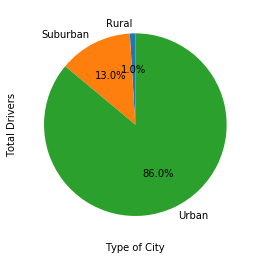

In [66]:
# Create a bar chart based off of the group series from before
ax1 = plt.subplot(121, aspect="equal")
tot_dpie = tot_d.plot(kind='pie', ax=ax1, autopct="%1.1f%%", figsize=(9,9), shadow=False, startangle=90)

# Set the xlabel and ylabel using class methods
tot_dpie.set_xlabel("Type of City")
tot_dpie.set_ylabel("Total Drivers")
plt.show()

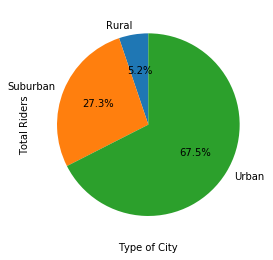

In [67]:
# Create a bar chart based off of the group series from before
ax1 = plt.subplot(121, aspect="equal")
tot_rpie = tot_r.plot(kind='pie', ax=ax1, autopct="%1.1f%%", figsize=(9,9), shadow=False, startangle=90)

# Set the xlabel and ylabel using class methods
tot_rpie.set_xlabel("Type of City")
tot_rpie.set_ylabel("Total Riders")
plt.show()

In [68]:
groupbycity = merged_cityride_df.groupby(["city", "type"])
tot_fare = groupbycity.sum()
tot_fare.head()

,,driver_count,fare,ride_id
city,type,,,
Alvarezhaven,Urban,651,741.79,165899161874789
Alyssaberg,Urban,1742,535.85,91953627077845
Anitamouth,Suburban,144,335.84,37762826439863
Antoniomouth,Urban,462,519.75,111909606921566
Aprilchester,Urban,931,417.65,86920968698689


In [69]:
tot_f = tot_fare.groupby("type")
tot_f = tot_f.sum()

In [70]:
tot_f

,driver_count,fare,ride_id
type,,,
Rural,727,4255.09,658729360193746
Suburban,9730,20335.69,3139583688401015
Urban,64501,40078.34,7890194186030600


In [71]:
tot_fare = tot_f["fare"]
tot_fare

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

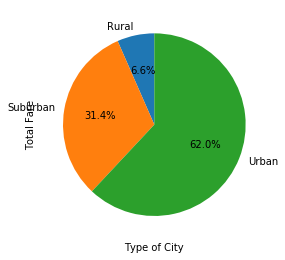

In [72]:
# Create a bar chart based off of the group series from before
ax1 = plt.subplot(121, aspect="equal")
tot_fpie = tot_fare.plot(kind='pie', ax=ax1, autopct="%1.1f%%", figsize=(9,9), shadow=False, startangle=90)

# Set the xlabel and ylabel using class methods
tot_fpie.set_xlabel("Type of City")
tot_fpie.set_ylabel("Total Fare")
plt.show()

In [73]:
analysis = df.groupby("type")
analysis.mean()

,ave_fare_percity,total_drivers_percity,total_rides_percity
type,,,
Rural,34.207143,40.388889,6.944444
Suburban,30.942131,237.317073,16.024390
Urban,24.603991,977.287879,24.621212


Provide 3 written descriptions of 3 observable trands based on the data:

From the Bubble Chart:
--> Rural cities have the highest average fare, but the lowest total fares.  Their total # of drivers are less.
The Urban are in the right most of the two categories of Rural and Suburban, the urban have large total # of drivers and their average fare is lowest, and their total # of drives are high.

From the Pie Chart:
-->Urban cities have the most total drivers, total riders, and total fares per city, followed by suburban and then rural – which makes sense.  Since more business for rides in urban cities vs. suburban and rural.

From the table analysis:
--> Average fares by Urban cities are lowest.  Although the Urban cities have the highest total fare revenue. 

